## LangGraph for making agentic systems
- LangGraph는 LLM을 활용한 워크플로우를 구현하기 위한 프레임 워크
- 시스템의 상태를 기반으로 동작하며 흐름을 그래프(노드-엣지)로 표현
- 동적인 동작 제어와 관리를 통해 고도화된 Agentic Systems를 구현

In [1]:
!pip install -qU tavily-python langchain_community langchain_anthropic langgraph langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.9/397.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


## How to use Tavily Search API

Tavily Search Documents : https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started

Get API Key : https://app.tavily.com/home

In [ ]:
import os
os.environ["TAVILY_API_KEY"] = "tvly-..."

In [3]:
from tavily import TavilyClient

tavily_client = TavilyClient()

**search**

- Return : dict with all related response fields

In [4]:
response = tavily_client.search("What is AI Agent?", max_results=3) # , topic="news", days = 10
print(response)

{'query': 'What is AI Agent?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.ibm.com/think/topics/ai-agents', 'title': 'What Are AI Agents? | IBM', 'content': 'An artificial intelligence (AI) agent refers to a system or program that is capable of autonomously performing tasks on behalf of a user or another system.', 'score': 0.99987173, 'raw_content': None}, {'url': 'https://www.reddit.com/r/AI_Agents/comments/1kgruv2/what_even_is_an_ai_agent/', 'title': 'What even is an AI agent? : r/AI_Agents - Reddit', 'content': 'An AI agent is generally understood as a software system that can perform tasks autonomously by orchestrating multiple processing steps,', 'score': 0.99984396, 'raw_content': None}, {'url': 'https://en.wikipedia.org/wiki/AI_agent', 'title': 'AI agent - Wikipedia', 'content': '# AI agent. 9. ^ ***a*** ***b*** ***c*** ***d*** ***e*** ***f*** ***g*** ***h*** ***i*** ***j*** ***k*** "AI Agents: The Next Generation of Artificial Int

In [5]:
response['results']

[{'url': 'https://www.ibm.com/think/topics/ai-agents',
  'title': 'What Are AI Agents? | IBM',
  'content': 'An artificial intelligence (AI) agent refers to a system or program that is capable of autonomously performing tasks on behalf of a user or another system.',
  'score': 0.99987173,
  'raw_content': None},
 {'url': 'https://www.reddit.com/r/AI_Agents/comments/1kgruv2/what_even_is_an_ai_agent/',
  'title': 'What even is an AI agent? : r/AI_Agents - Reddit',
  'content': 'An AI agent is generally understood as a software system that can perform tasks autonomously by orchestrating multiple processing steps,',
  'score': 0.99984396,
  'raw_content': None},
 {'url': 'https://en.wikipedia.org/wiki/AI_agent',
  'title': 'AI agent - Wikipedia',
  'content': '# AI agent. 9. ^ ***a*** ***b*** ***c*** ***d*** ***e*** ***f*** ***g*** ***h*** ***i*** ***j*** ***k*** "AI Agents: The Next Generation of Artificial Intelligence". ^ ***a*** ***b*** ***c*** "What are the risks and benefits of \'AI 

**get_search_context**

- Return : str containing the content and sources of the results

In [8]:
context = tavily_client.get_search_context(query="What is AI Agent?")
print(context)

/tmp/ipython-input-3674300269.py:1: DeprecationWarning: get_search_context is deprecated and will be removed in future versions.
  context = tavily_client.get_search_context(query="What is AI Agent?")


[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "An artificial intelligence (AI) agent refers to a system or program that is capable of autonomously performing tasks on behalf of a user or another system."}, {"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "# What are AI Agents? * How does an AI agent work? * What are the challenges of using AI agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. While traditional software follows hard-coded instructions, AI agents identify the next appropriate action based on past data and execute it without continuous human oversight. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. Business teams are more productive when they delegate repetiti

In [9]:
context

'[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "An artificial intelligence (AI) agent refers to a system or program that is capable of autonomously performing tasks on behalf of a user or another system."}, {"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "# What are AI Agents? * How does an AI agent work? * What are the challenges of using AI agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. While traditional software follows hard-coded instructions, AI agents identify the next appropriate action based on past data and execute it without continuous human oversight. AI agents interact with their environment by collecting data through sensors or digital inputs. The AI agent applies the data to make an informed decision. Business teams are more productive when they delegate repetit

**qna_search**

- Return : str, containing a short answer to the search query

In [10]:
answer = tavily_client.qna_search(query="What is AI Agent?")
print(answer)

/tmp/ipython-input-1630415381.py:1: DeprecationWarning: qna_search is deprecated and will be removed in future versions.
  answer = tavily_client.qna_search(query="What is AI Agent?")


An AI agent is a software program that autonomously performs tasks, learns from experiences, and can interact with its environment to achieve goals. AI agents use advanced AI to automate complex workflows and make decisions independently. They can coordinate with other agents to solve problems efficiently.


In [11]:
answer

'An AI agent is a software program that autonomously performs tasks, learns from experiences, and can interact with its environment to achieve goals. AI agents use advanced AI to automate complex workflows and make decisions independently. They can coordinate with other agents to solve problems efficiently.'

## How to use Tavily Search **as Tool** in Langchain

- https://python.langchain.com/api_reference/community/tools/langchain_community.tools.tavily_search.tool.TavilySearchResults.html

- Tool that queries the Tavily Search API and gets back json

In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2) #웹 검색 tool
tool.invoke("What's a 'node' in LangGraph?")

/tmp/ipython-input-1835957720.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'Understanding Core Concepts of LangGraph (Deep Dive)',
  'url': 'https://dev.to/raunaklallala/understanding-core-concepts-of-langgraph-deep-dive-1d7h',
  'content': '### 1. Nodes: The Execution Units\n\nA Node is basically “a single action.” Imagine breaking your workday into steps: checking email, making coffee, writing code, or scheduling a meeting. Each of those is a Node.\n\nIn LangGraph, a Node can be many things:\n\n A large language model call (like GPT, Gemini, or LLaMA).\n A tool (search engine lookup, calculator, weather API, database query).\n A custom function (Python function, regex cleaner, summarizer).\n\nEach Node is like a worker with a simple contract: it takes an input, does its piece of the job, and pushes out an output.\n\nEveryday example:  \n  \n Think about ordering food on a delivery app. [...] One Node takes your food order.\n Another Node calls the restaurant’s system.\n Another Node calculates delivery time. Each does one thing, and together they

### **Binding tools**

- LLM이 질문에 적합한 Tool을 호출하기

- https://python.langchain.com/v0.1/docs/modules/model_io/chat/function_calling/#request-passing-tool-outputs-to-model

In [ ]:
os.environ["OPENAI_API_KEY"] = "sk-proj-..."

In [14]:
# Example: Passing tool outputs to model
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [15]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [16]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_Q4o9NOOFlqJ32fGvZrTgNnW1',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_B4uFANkK1ZUNLQcjSQtfKNU8',
  'type': 'tool_call'}]

In [17]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls

[]

### **Apply to Tavily Search**

In [18]:
from langchain_openai import ChatOpenAI

tool = TavilySearchResults(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools) # TavilySearchResults(tools) 을 호출할 수 있도록 함

In [19]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 81, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ad98c18a04', 'id': 'chatcmpl-D5oYQBQH9IOEFXyi6d64qsiDpzeYX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c2ccf-cd15-7112-a1fc-1e2d800c3a63-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 81, 'output_tokens': 12, 'total_tokens': 93, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
llm_with_tools.invoke("안녕").tool_calls

[]

In [20]:
llm_with_tools.invoke("What is Langgraph?")

AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 84, 'total_tokens': 103, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ad98c18a04', 'id': 'chatcmpl-D5oYRNOr5XU03wCXcRhHjkiX1yN0J', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c2ccf-d1f9-7e13-b148-462b1265480d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Langgraph'}, 'id': 'call_DuKbuz6NkPbRYLyKV73clJ8d', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 84, 'output_tokens': 19, 'total_tokens': 103, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [21]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'Langgraph'},
  'id': 'call_OlWAK4ryfUNFXIMxnYEeK6sJ',
  'type': 'tool_call'}]

## Langgraph - Web search + LLM = 검색 Chatbot

- Tool을 호출하고 그 결과를 모델(LLM)로 전달하기

- https://langchain-ai.github.io/langgraph/tutorials/introduction/#part-2-enhancing-the-chatbot-with-tools

### **Node** - 실제 작업을 수행하는 단위
- chatbot, tools

**chatbot**

In [23]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict): # 그래프의 상태를 정의하는 클래스
    messages: Annotated[list, add_messages] # 메시지 누적

graph_builder = StateGraph(State) # StateGraph 생성 (대화 흐름 관리)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

**tools**

In [24]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
        A node that runs the tools requested in the last AIMessage.
        마지막 AIMessage에서 요청된 도구를 실행하는 노드
    """

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search_results_json" : TavilySearchResults()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

### **Edge** - 노드 간의 연결

**조건부 엣지, 라우팅 (add_conditional_edges)**

In [25]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0: # if the last message has "tool_calls"
        return "tools"
    return END

# 조건부 엣지 연결
graph_builder.add_conditional_edges(
    "chatbot", # 시작 노드
    route_tools,
    {"tools": "tools", END: END}, # 반환값이 "tools" 면 "tools" 노드로, END 면 END로 이동
)

In [26]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

### **그래프 시각화**

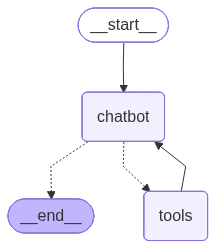

In [27]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### **실행**

In [28]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [29]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: 안녕
Assistant: 안녕하세요! 무엇을 도와드릴까요?
User: LangGraph가 뭐야?
Assistant: 
Assistant: [{"title": "LangGraph overview - Docs by LangChain", "url": "https://docs.langchain.com/oss/python/langgraph/overview", "content": "Trusted by companies shaping the future of agents\u2014 including Klarna, Replit, Elastic, and more\u2014 LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.We will commonly use LangChain components throughout the documentation to integrate models and tools, but you don\u2019t need to use LangChain to use LangGraph. If you are just getting started with agents or want a higher-level abstraction, we recommend you use LangChain\u2019s agents that provide pre-built architectures for common